## 01) 주가지수

In [3]:
import pandas as pd

df_13 = pd.read_excel('data/data_20210913.xlsx', index_col=0)
df_14 = pd.read_excel('data/data_20210914.xlsx', index_col=0)
print(len(df_13))
print(len(df_14))

936
937


In [16]:
# 9월 13일에는 936개 종목, 9월 14일에는 937개 종목이 상장돼 있음을 알 수 있습니다. 
# 종목의 변화가 생겼기 때문에 기준시가총액을 수정해서 사용해야 합니다.

# 출력된 결과를 참고하면 2021-09-14에는 395400의 SK리츠가 추가 상장된 것을 알 수 있습니다. 
# 행과 열의 정보를 한 번에 선택하는 인덱싱을 사용했습니다.
idx = df_14.index.difference(df_13.index)
print(idx)
print(df_14.loc[idx[0], '종목명'])

Index(['395400'], dtype='object', name='종목코드')
SK리츠


In [19]:
# 다음 코드는 시가총액의 증감률을 구해서 수정된 기준시가총액을 유도하고 최종적으로 지수의 증감률을 출력합니다.

전일비교시가총액 = df_13['시가총액'].sum()
전일기준시가총액 = df_13['시가총액'].sum()
증감률 = (전일비교시가총액 + df_14.loc[idx[0], '시가총액']) / 전일비교시가총액
당일기준시가총액 = 증감률 * 전일기준시가총액
당일비교시가총액 = df_14['시가총액'].sum()
print(당일비교시가총액 / 당일기준시가총액)

1.006711949331194


In [20]:
# 출력되는 결과를 참고하면 2021-09-14의 지수는 반올림해서 약 0.67% 상승했음을 알 수 있습니다. 
# 그림 8.1.1의 등락률 컬럼의 값과 비슷하죠? 아직 고려해야 할 내용이 남아 있어서 완전히 같지 않습니다.
# 종목의 상장뿐만 아니라 전환 사채 등의 이슈로 주식 수가 변경되는 것도 반영해야 합니다. 
# 주식 수가 변경된 종목이 있는지 확인해 봅시다.

idx = df_14.index.intersection(df_13.index)
t_13 = df_13.loc[idx]
t_14 = df_14.loc[idx]
cond = t_13['상장주식수'] != t_14['상장주식수']
print(cond.all()) # 시리즈의 all 메서드는 시리즈의 모든 값이 True 라면 True를, 그렇지 않다면 False를 반환합니다. 

False


In [30]:
cond[cond == True]

종목코드
001570    True
011930    True
Name: 상장주식수, dtype: bool

In [25]:
# 조건 슬라이싱과 시리즈 연산으로 변경사항이 있는 종목들의 추가된 상장주식 수를 출력합니다.

t_14.loc[cond, '상장주식수'] - t_13.loc[cond, '상장주식수'] 


종목코드
001570    499996
011930      5661
Name: 상장주식수, dtype: int64

In [32]:
# 주식 수의 증가에 따른 시가총액을 수정된 비교시가총액에 반영해 봅시다. 
# 2021-09-13의 종가와 추가된 주식 수를 곱해서 증가액을 계산하고 증감률에 반영합니다. 
# 라인 1과 라인 4의 변경된 코드를 눈여겨보세요.

주식수증가액 = (t_14.loc[cond, '상장주식수'] - t_13.loc[cond, '상장주식수']) * t_13.loc[cond, '종가']
전일비교시가총액 = df_13['시가총액'].sum()
전일기준시가총액 = df_13['시가총액'].sum()
증감률 = (전일비교시가총액 + df_14.loc[idx[0], '시가총액'] + 주식수증가액.sum()) / 전일비교시가총액
당일기준시가총액 = 증감률 * 전일기준시가총액
당일비교시가총액 = df_14['시가총액'].sum()
print(당일비교시가총액 / 당일기준시가총액)

1.0069842957814492


## 02) 코스피와 삼성전자

In [34]:
# 2021-09-14을 기준으로 코스피 시장에 상장된 종목들의 현황을 확인해 보겠습니다. 
# 엑셀 파일의 전 종목 데이터를 읽어와서 종목명, 종가, 시가총액 컬럼만을 선택합니다.

import pandas as pd
df = pd.read_excel('data/data_20210914.xlsx', index_col=0)
df = df[['종목명', '종가', '시가총액']]
df

,종목명,종가,시가총액
종목코드,,,
095570,AJ네트웍스,6000,280933770000
006840,AK홀딩스,27700,366957439700
027410,BGF,6260,599187111660
282330,BGF리테일,179000,3093819174000
138930,BNK금융지주,8070,2630297435220
...,...,...,...
069260,휴켐스,27050,1105765805400
000540,흥국화재,4045,259861499025
000547,흥국화재2우B,29500,4531200000


In [35]:
# usescols 파라미터를 사용하면 한 번에 필요한 컬럼을 선택할 수 있어서 매우 편리합니다. 
# 원본 엑셀 데이터에서 종목코드, 종목명, 종가, 시가총액의 네 개의 컬럼을 선택하고 나서, 
# index_col로 0번 컬럼을 인덱스로 지정합니다.

df = pd.read_excel('data/data_20210914.xlsx', index_col=0, usecols=[0, 1, 2, 10])
df.head()

,종목명,종가,시가총액
종목코드,,,
095570,AJ네트웍스,6000,280933770000
006840,AK홀딩스,27700,366957439700
027410,BGF,6260,599187111660
282330,BGF리테일,179000,3093819174000
138930,BNK금융지주,8070,2630297435220


In [50]:
# 각 종목이 차지하는 시가총액의 비중을 구한 뒤에 비중을 기준으로 정렬해 봅시다. 
# 시리즈의 sum 메서드로 전 종목의 합을 구해서 시가총액 시리즈를 나누고 100을 곱합니다. 
# 브로드캐스팅이 적용되어 전체 데이터에 연산이 적용됩니다. 이어서 비중 컬럼을 내림차순으로 정렬합니다.

df['비중'] = df['시가총액']/df['시가총액'].sum() * 100
df.sort_values('비중', ascending=False).head()

,종목명,종가,시가총액,비중
종목코드,,,,
005930,삼성전자,76600,457285343330000,20.054103
000660,SK하이닉스,107500,78260254237500,3.432078
035420,NAVER,402500,66116016487500,2.899497
207940,삼성바이오로직스,913000,60408645000000,2.649202
005935,삼성전자우,71400,58754110380000,2.576643


In [ ]:
# 삼성전자와 코스피 지수의 유사한 정도를 확인하기 위해 산포도를 그려서 데이터의 흩어진 정도를 시각화해 봅시다. 
# 다음 코드는 2020년 1월 1일부터 2021년 8월 31일까지의 코스피 지수와 삼성전자의 OHLCV 데이터를 읽습니다.

import numpy as np

kospi = pd.read_excel("data/kospi.xlsx")
samsung = pd.read_excel("data/samsung.xlsx")

data = [ kospi['종가'], samsung['종가'] ]
df = pd.concat(data, axis=1, keys=["kospi", "samsung"])
df.head()

In [68]:
kospi = pd.read_excel("data/kospi.xlsx")
samsung = pd.read_excel("data/samsung.xlsx")


data = [ kospi['종가'], samsung['종가'] ]
df = pd.concat(data, axis=1, keys=['kospi', 'samsung'])
df.tail()

C:\Users\USER\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,kospi,samsung
655,2025.27,NaN
656,2037.10,NaN
657,2010.25,NaN
658,1993.70,NaN
659,2010.00,NaN


<AxesSubplot:xlabel='samsung', ylabel='kospi'>

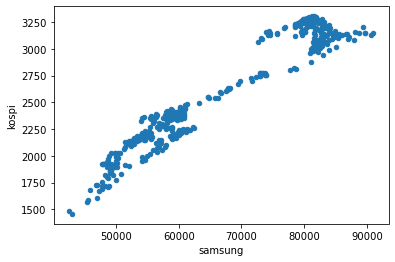

In [70]:
# 컬럼 단위로 저장된 데이터는 시각화하기 좋은 형태입니다. 
# 데이터프레임의 plot 속성 안의 scatter 메서드로 산포도를 그립니다. 
# x 축에는 삼성전자의 종가, y축에는 코스피 지수를 연결합니다.

df.plot.scatter(x='samsung', y='kospi')

# 코스피 지수와 삼성전자의 종가는 그림 8.2.4와 같이 강한 양의 상관관계 가 있음을 알 수 있습니다. 
# 코스피 지수가 시가총액 합산 방식으로 계산돼서, 지수의 20%를 차지하는 삼성전자의 종가와 코스피 지수는 높은 연관성이 있는 겁니다.

In [71]:
# 상관계수를 계산해서 유사한 정도를 수치화해 봅시다. 
# 상관계수는 -1에서 +1 범위 내의 숫자로 표현됩니다. 
# 상관계수가 0.9 이상이면 매우 강한 양의 상관관계, 0.7 이상이면 강한 양의 상관관계가 있다고 말할 수 있습니다. 
# 판다스의 corr 메서드는 컬럼 단위로 상관계수를 계산합니다.

df.corr()

,kospi,samsung
kospi,1.000000,0.966597
samsung,0.966597,1.000000


## 03) 코스피의 통계

In [72]:
# 2020년 1월부터 2021년 8월까지의 코스피 지수의 통계를 구해 보겠습니다. 
# 다음 코드는 첫 번째 컬럼을 인덱스로 지정하며, 인덱스를 문자열이 아닌 날짜로 해석합니다. 
# parse_dates는 데이터를 읽으면서 날짜를 DatetimeIndex 객체로 변경하는 유용한 옵션입니다.

import pandas as pd 
kospi = pd.read_excel("data/kospi.xlsx", index_col=0, parse_dates=True)
kospi

C:\Users\USER\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
일자,,,,,,,,,
2021-08-31,3199.27,55.08,1.75,3144.49,3199.89,3130.30,661221.0,15863630.0,2.309063e+09
2021-08-30,3144.19,10.29,0.33,3160.87,3164.87,3132.77,602858.0,11758710.0,2.269581e+09
2021-08-27,3133.90,5.37,0.17,3116.29,3143.01,3106.97,520669.0,11039934.0,2.262423e+09
2021-08-26,3128.53,-18.28,-0.58,3151.30,3159.37,3121.04,727719.0,13335288.0,2.259280e+09
2021-08-25,3146.81,8.51,0.27,3148.13,3161.00,3124.25,624688.0,13365596.0,2.272311e+09
...,...,...,...,...,...,...,...,...,...
2019-01-08,2025.27,-11.83,-0.58,2038.68,2042.70,2023.59,397831.0,4826642.0,1.333996e+09
2019-01-07,2037.10,26.85,1.34,2034.24,2048.06,2030.90,440191.0,5301385.0,1.342382e+09
2019-01-04,2010.25,16.55,0.83,1992.40,2011.56,1984.53,408991.0,5490148.0,1.323719e+09


In [74]:
# 주어진 기간에서 코스피 지수의 최저가와 최고가를 구해 봅시다.
kospi['종가'].min(), kospi['종가'].max()

(1457.64, 3305.21)

In [86]:
# 그렇다면 종가를 기준으로 최고가를 기록한 거래일은 언제일까요? 
# 인덱스에는 일자가 들어 있어서 인덱스와 데이터를 함께 얻어오면 원하는 정보를 얻을 수 있습니다. 
# 다음 코드는 최댓값과 종가 시리즈를 비교해서 조건을 이용한 슬라이싱으로 최댓값이 들어 있는 데이터프레임을 선택합니다.
 
kospi_max = kospi[kospi['종가'] == kospi['종가'].max()]
print(kospi_max)

cond =  kospi['종가'] == kospi['종가'].max()
kospi.loc[cond]

                 종가    대비   등락률       시가       고가       저가        거래량  \
일자                                                                      
2021-07-06  3305.21  12.0  0.36  3295.44  3313.51  3295.44  1029465.0   

                  거래대금        상장시가총액  
일자                                    
2021-07-06  14686383.0  2.314417e+09  


,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
일자,,,,,,,,,
2021-07-06,3305.21,12.0,0.36,3295.44,3313.51,3295.44,1029465.0,14686383.0,2.314417e+09


In [90]:
# 선택된 데이터프레임의 인덱스는 DatetimeIndex 객체라서 정수 인덱싱으로 첫 번째 날짜를 가져올 수 있습니다.
# DatetimeIndex 객체 안에 저장돼 있던 2021-07-06의 Timestamp 객체가 출력됩니다.

print(kospi.loc[cond].index)
kospi.loc[cond].index[0]

DatetimeIndex(['2021-07-06'], dtype='datetime64[ns]', name='일자', freq=None)


Timestamp('2021-07-06 00:00:00')

In [93]:
# 간단한 기능인데 조건 비교까지 써야 해서 코드가 복잡해집니다. 
# 빈번하게 사용하는 기능이라서 판다스의 시리즈는 idxmax와 idxmin 메서드를 제공합니다.

print(kospi['종가'].idxmin())
print(kospi['종가'].idxmax())

2020-03-19 00:00:00
2021-07-06 00:00:00


In [9]:
# 이번에는 코스피 지수의 최대 상승폭과 최대 하락폭을 5개씩 출력해 보겠습니다. 
# 다음 코드는 전일 종가와 당일 종가의 차이를 변동폭이라는 컬럼에 저장한 후 정렬해서 데이터를 슬라이싱합니다.

import pandas as pd 

kospi = pd.read_excel("data/kospi.xlsx", index_col=0, usecols=[0, 1])
kospi['변동폭'] = kospi['종가'] - kospi['종가'].shift(1)
print(kospi.sort_values('변동폭').iloc[:5])
print(kospi.sort_values('변동폭', ascending=False).iloc[:5])


                 종가     변동폭
일자                         
2020/03/23  1482.46 -127.51
2021/01/07  3031.68 -120.50
2020/03/19  1457.64 -108.51
2020/06/15  2030.82 -107.23
2021/02/24  2994.98 -104.71
                 종가     변동폭
일자                         
2020/03/18  1591.20  133.56
2020/06/12  2132.30  101.48
2021/01/28  3069.05   92.84
2021/02/25  3099.69   86.74
2020/08/19  2360.54   86.32


C:\Users\USER\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [12]:
# nlargest와 nsmallest 메서드를 알고 있다면 코드를 간략하게 표현할 수 있습니다. 
# 메서드로 넘겨주는 숫자를 변경하면 반환되는 데이터의 개수를 지정할 수 있습니다. 
# 코드를 실행하면 정렬 후 슬라이싱하는 코드와 같은 결과를 얻을 수 있습니다.

print(kospi["변동폭"].nlargest(n=5))
print(kospi["변동폭"].nsmallest(n=5))

일자
2020/03/18    133.56
2020/06/12    101.48
2021/01/28     92.84
2021/02/25     86.74
2020/08/19     86.32
Name: 변동폭, dtype: float64
일자
2020/03/23   -127.51
2021/01/07   -120.50
2020/03/19   -108.51
2020/06/15   -107.23
2021/02/24   -104.71
Name: 변동폭, dtype: float64


In [22]:
# 이번에는 월별로 코스피의 시가/고가/저가/종가/거래량을 정리해 보겠습니다. 
# 날짜를 연도와 월로 분할하고 groupby를 사용해서 집계할 수 있습니다.

kospi = pd.read_excel("data/kospi.xlsx", usecols=[0,1,4,5,6,7], parse_dates=[0])
how = {
    '시가':'first',
    '고가':max,
    '저가':min,
    '종가':'last',
    '거래량':sum
}

df = kospi.groupby(pd.Grouper(key='일자', freq='m')).agg(how)
df.head()

,시가,고가,저가,종가,거래량
일자,,,,,
2019-01-31,2050.55,2222.88,1984.53,2204.85,9455198.0
2019-02-28,2211.93,2241.76,2167.36,2195.44,6882555.0
2019-03-31,2210.97,2216.02,2120.93,2140.67,6458056.0
2019-04-30,2153.31,2252.05,2153.31,2203.59,9689747.0
2019-05-31,2192.94,2217.03,2016.25,2041.74,11242892.0


In [20]:
# 이번에는 종가를 기준으로 지수의 이벤트를 정리해 보겠습니다. 
# 규칙적으로 데이터를 슬라이싱 하거나 특정 값을 기준으로 비교한다면 판다스의 브로드캐스팅을 사용할 수 있습니다. 
# 하지만 돌파 이벤트는 불규칙적인 위치의 값을 선택해야 해서 반복문으로 데이터를 수집하고 
# 데이터프레임으로 변환하는 작업을 해야 합니다.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      660 non-null    datetime64[ns]
 1   종가      660 non-null    float64       
 2   시가      660 non-null    float64       
 3   고가      660 non-null    float64       
 4   저가      660 non-null    float64       
 5   거래량     660 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 31.1 KB


In [41]:
# 하나의 이벤트로 결과를 확인하고 전체 이벤트로 확장해 봅시다. 
# 다음 코드는 코스피 지수가 2,300 포인트를 처음 돌파한 날을 찾습니다.

kospi = pd.read_excel('data/kospi.xlsx', usecols=[0,1], index_col=0, parse_dates=True)
kospi = kospi.sort_index()

threshold = 2300
cond = kospi['종가'] >= threshold
print(kospi.loc[cond, '종가'].iloc[0])
print(kospi.loc[cond, '종가'].index[0])

2311.86
2020-08-05 00:00:00


C:\Users\USER\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [47]:
# 반복문을 사용해서 전체 이벤트로 확장합니다. 
# 각각의 탐색을 구분하기 위해 이벤트, 지수, 일자 정보를 출력합니다.

kospi = pd.read_excel('data/kospi.xlsx', usecols=[0,1], index_col=0, parse_dates=True)
kospi = kospi.sort_index()

for threshold in range(2300, 3100, 100):
    cond = kospi['종가'] >= threshold
    print(threshold, kospi.loc[cond, '종가'].iloc[0], kospi.loc[cond, '종가'].index[0])


2300 2311.86 2020-08-05 00:00:00
2400 2418.67 2020-08-11 00:00:00
2500 2543.03 2020-11-16 00:00:00
2600 2602.59 2020-11-23 00:00:00
2700 2731.45 2020-12-04 00:00:00
2800 2806.86 2020-12-24 00:00:00
2900 2944.45 2021-01-04 00:00:00
3000 3031.68 2021-01-07 00:00:00


In [50]:
# 데이터를 리스트로 모아서 데이터프레임으로 변환하도록 코드를 수정합니다. 
# 리스트 안에 튜플로 문자열로 된 이벤트, 일자, 지수 정보를 차례로 정의합니다.

data = [ ]
for threshold in range(2300, 3100, 100):
    cond = kospi['종가'] > threshold
    data.append( (f'{threshold} 포인트 돌파', kospi.index[cond][0], kospi.loc[cond, '종가'].iloc[0]) )

df = pd.DataFrame(data, columns=['이벤트', '일자', '지수'])
print(df)

           이벤트         일자       지수
0  2300 포인트 돌파 2020-11-02  2300.16
1  2400 포인트 돌파 2020-09-08  2401.91
2  2500 포인트 돌파 2020-11-17  2539.15
3  2600 포인트 돌파 2020-11-25  2601.54
4  2700 포인트 돌파 2020-12-08  2700.93
5  2800 포인트 돌파 2020-12-24  2806.86
6  2900 포인트 돌파 2021-01-04  2944.45
7  3000 포인트 돌파 2021-03-23  3004.74


## 04) 코스피 수익률

In [52]:
# 2020-01-02일부터 2021-08-31일까지 투자했을 때의 코스피 시장수익률을 계산해 보겠습니다. 
# 계산의 편의를 위해 2020-01-02 일 종가에 사서 2021-08-31 일 종가에 팔았다고 가정합니다.

import pandas as pd

kospi = pd.read_excel("data/kospi.xlsx", usecols=[0, 1], index_col=0, parse_dates=True)
kospi = kospi.sort_index()
수익률 = kospi.iloc[-1, 0]/kospi.iloc[0, 0]
print( (수익률 - 1) * 100 )

59.167661691542285


C:\Users\USER\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [54]:
# 코드를 실행하면 약 47%의 수익률을 확인할 수 있습니다. 
# 보유한 기간 동안의 수익률을 짧게 줄여 ‘기간수익률’이라고 부릅니다. 
# 기간수익률에는 투자기간이라는 개념이 포함되어 있지 않습니다. 
# 투자에는 당연히 투자기간이 중요합니다. 1년 투자에서 2배를 버는 것과 10년 투자에서 2배를 버는 것에는 차이가 있지요?

# 연복리수익률(Compound Annual Growth Rate, CAGR)은 투자 기간을 고려한 수익률로 다음과 같이 계산됩니다. 
# 수식에서 투자 기간의 단위는 ‘년’입니다. 연복리수익률을 다른말로 연평균수익률이라고도 합니다.
#  CAGR(Compound Annual Growth Rate) = (최종자산 / 최초자산)**(1 / 투자기간(년)) - 1

# 2020-01-02에서 2021-08-31까지 18개월 동안 얻은 47%의 수익률을 CAGR로 계산해 보겠습니다.



diff = (kospi.index[-1] - kospi.index[0])
투자기간 = diff.days / 365
cagr = 수익률 ** (1/투자기간) -1
print(cagr)  # 연평균 수익률 또는 연복리수익률

0.19069189759525607


In [57]:
# 보유 자산을 100% 삼성전자에 투자했다면 연평균수익률이 어떻게 되는지 확인해 봅시다. 
# 위 코드를 한데 모으고 엑셀 파일의 경로만 수정했습니다.

ss = pd.read_excel("data/samsung.xlsx", usecols=[0, 1], index_col=0, parse_dates=True)
ss = ss.sort_index()

수익률 = ss.iloc[-1, 0] / ss.iloc[0, 0]
diff = ss.index[-1] - ss.index[0]
투자기간 = diff.days / 365
cagr = 수익률 ** (1/투자기간) - 1
print(cagr * 100)
f'{cagr * 100} %'


21.871470174981077


C:\Users\USER\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


'21.871470174981077 %'

<AxesSubplot:>

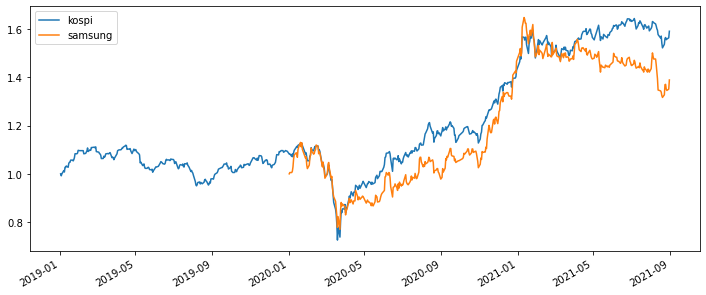

In [58]:
# 삼성전자와 코스피 지수의 수익률을 시각화해 보겠습니다.
kospi_return = kospi['종가'] / kospi.iloc[0, 0]
ss_return = ss['종가']       / ss.iloc[0, 0]

df = pd. concat([kospi_return, ss_return], axis=1, keys=['kospi','samsung'])
df.index.name = ''
df.plot(figsize=(12,5))

## 05) Maximum Drawdown
투자 알고리즘의 주요 성과 지표 중 하나로 MDD가 있습니다. MDD는 낙폭(Drawdown) 중 최댓값을 의미합니다. 표 8.5.1의 데이터를 사용해 낙폭 계산에 필요한 전고점의 개념을 이해해봅시다. 표 8.5.1에는 거래일별로 종가가 저장돼 있습니다. 전고점은 투자 시점부터 현재 거래일까지의 가격 중 가장 높은 가격을 의미합니다. 예를 들어, 2020-03-03의 전고점은 max([100, 120, 100])으로 계산해서 2020-03-02의 종가 120이 됩니다. 이를 반복해서 거래일별로 전고점을 얻을 수 있습니다.

각 거래일의 가격과 전고점을 구했다면 낙폭을 계산해봅시다. 낙폭은 다음 수식과 같이 정의됩니다. 어떤 거래일에 전고점(high)이 100이고 가격(cur)이 80이라면 해당 거래일의 낙폭은 20%입니다. 모든 거래일에 대해서 낙폭을 구한 후 그중 가장 큰 낙폭이 바로 MDD입니다. 위 표의 데이터를 기준으로 하면 2020-03-04의 25%가 투자 기간의 최대 낙폭(MDD)입니다.

Drawdown(낙폭) = ((high - cur) / high) * 100 


In [68]:
# 2000-01-01 이후의 코스피 지수 데이터를 사용해서 거래일별로 전고점을 구하고 종가와 전고점을 이용해 낙폭을 계산해봅시다.

import pandas as pd

kospi = pd.read_excel("data/kospi2000.xlsx", index_col=0)
kospi['전고점'] = kospi['Close'].cummax() # cummax 메소드는 이전일까지의 값 중 최댓값을 구함
kospi['DD'] = (1 - kospi['Close'] / kospi['전고점']) * 100
kospi.head(5)

,Close,Open,High,Low,Volume,Change,전고점,DD
Date,,,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,195900000.0,0.0301,1059.04,0.000000
2000-01-05,986.31,1006.87,1026.52,984.05,257700000.0,-0.0687,1059.04,6.867540
2000-01-06,960.79,1013.95,1014.90,953.50,203520000.0,-0.0259,1059.04,9.277270
2000-01-07,948.65,949.17,970.16,930.84,215660000.0,-0.0126,1059.04,10.423591
2000-01-10,987.24,979.67,994.94,965.02,240180000.0,0.0407,1059.04,6.779725


In [75]:
1 - (987.24 / 1059.04)

0.06779725033993045

In [74]:
(1 - 987.24 / 1059.01) * 100

6.7770842579390145

In [76]:
# MDD는 Drawdown 컬럼의 최댓값입니다. 
# 데이터프레임의 컬럼이 시리즈 객체이므로 시리즈 객체의 max 메서드를 호출하면 MDD를 구할 수 있습니다.

MDD = kospi['DD'].max()
print(MDD)

55.73727149116181


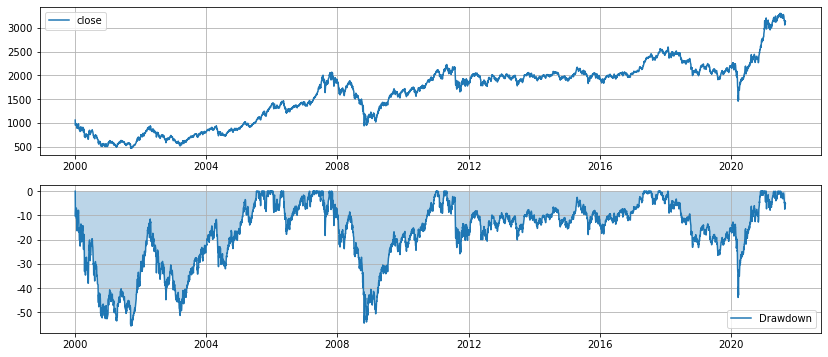

In [83]:
# 이번에는 코스피지수와 낙폭을 그래프로 그려봅시다. 
# Figure 객체와 두 개의 AxesSubplot 객체를 생성한 후 첫 번째 AxesSubplot에는 코스피 지수를 
# 두 번째 AxesSubplot에는 Drawdown을 플롯팅합니다. fill_between 함수를 사용하여 영역의 색상을 채웠습니다.

import matplotlib.pyplot as plt

plt.rc('axes', unicode_minus=False) # y축 음수 처리

fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(kospi.index, kospi['Close'], label='close')
ax2.plot(kospi.index, kospi['DD'] * -1, label='Drawdown')
ax2. fill_between(kospi.index, kospi['DD'] * -1, alpha=0.3) # 색상 채우기

ax1.grid()
ax2.grid()

ax1.legend(loc='best')
ax2.legend(loc='best')
plt.show()

